<a href="https://colab.research.google.com/github/yohannmts/projet_immo_rouen/blob/main/Projet_1_immo_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import des librairies
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import make_regression


#Import des fichier de données

url_dict = {'2023': "https://www.data.gouv.fr/fr/datasets/r/78348f03-a11c-4a6b-b8db-2acf4fee81b1",
             '2022': "https://www.data.gouv.fr/fr/datasets/r/87038926-fb31-4959-b2ae-7a24321c599a",
             '2021': "https://www.data.gouv.fr/fr/datasets/r/817204ac-2202-4b4a-98e7-4184d154d98c",
             '2020': "https://www.data.gouv.fr/fr/datasets/r/90a98de0-f562-4328-aa16-fe0dd1dca60f",
             '2019': "https://www.data.gouv.fr/fr/datasets/r/3004168d-bec4-44d9-a781-ef16f41856a2",
             }

def get_subsample():
    # Initialise une liste pour stocker les données de toutes les années
    data_all_year = []

    # Itération sur le dictionnaire contenant les années et les URLs des fichiers de données
    for year, url in tqdm(url_dict.items()):
        # Affichage d'un message indiquant le début du traitement pour chaque année
        print(f'----------------start------- {year}-----')

        # Lecture du fichier de données CSV depuis l'URL spécifiée
        data_ = pd.read_csv(url, sep="|")

        # Suppression des colonnes indésirables du DataFrame
        data_ = data_.drop(['Identifiant de document', 'Reference document','1 Articles CGI',
                            '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
                            'No disposition','Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
                            '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
                            'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
                            'Nombre de lots','Prefixe de section', 'Section', 'Identifiant local',
                            'No plan', 'Nature culture','No Volume','1er lot',
                            'Nature culture speciale','B/T/Q', 'Nature mutation', 'Code voie', 'Code departement','Code commune','Surface terrain', 'Code type local' ], axis=1)

        # Renommage de certaines colonnes pour plus de clarté
        data_.rename(columns={'Surface reelle bati': 'Surface'}, inplace=True)
        data_.rename(columns={'Valeur fonciere': 'Prix'}, inplace=True)

        # Filtrage pour ne garder que les types de biens immobiliers "Appartement" ou "Maison"
        data_ = data_[(data_['Type local'] == 'Appartement') | (data_['Type local'] == 'Maison')]

        # Création d'une colonne 'adresse' en concaténant les colonnes 'No voie', 'Type de voie' et 'Voie'
        data_['adresse'] = data_.apply(lambda row: f"{row['No voie']} {row['Type de voie']} {row['Voie']}", axis=1)

        # Suppression des colonnes 'No voie', 'Type de voie' et 'Voie' car elles ont été concaténées dans 'adresse'
        data_.drop(columns=['No voie', 'Type de voie', 'Voie'], inplace=True)

        # Remplacement des virgules par des points dans la colonne "Prix" pour assurer le format numérique
        data_['Prix'] = data_['Prix'].str.replace(',', '.')

        # Affichage de la forme du DataFrame après l'importation et le traitement
        print('Shape from import :',data_.shape)

        # Filtrage des données pour ne conserver que celles de la commune de Rouen
        rouen = ['ROUEN']
        data_rouen = data_[data_['Commune'].isin(rouen)]

        # Affichage de la forme du DataFrame après le filtrage par commune
        print('Shape after subsample : ', data_rouen.shape)

        # Ajout d'une colonne 'year' contenant l'année correspondante à chaque entrée
        data_rouen['year'] = year

        # Ajout du DataFrame filtré et traité à la liste des données de toutes les années
        data_all_year.append(data_rouen)

        # Suppression des DataFrames temporaires pour économiser de la mémoire
        del data_
        del data_rouen

        # Affichage d'un message indiquant la fin du traitement pour chaque année
        print(f'--------------YEAR {year} Done -------')

    # Concaténation de tous les DataFrames de chaque année pour former un seul DataFrame global
    print('STARTING CONTENING')
    df = pd.concat(data_all_year)
    print('CONTENING DONE ')

    # Retourne le DataFrame global contenant les données filtrées et traitées de toutes les années
    return df

#Affichage du fichier
df = get_subsample()
df

  0%|          | 0/5 [00:00<?, ?it/s]

----------------start------- 2023-----


<ipython-input-1-40979e00951d>:29: DtypeWarning: Columns (14,18,23,24,26,28,29,31,32,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data_ = pd.read_csv(url, sep="|")


Shape from import : (1082996, 8)
Shape after subsample :  (2760, 8)
--------------YEAR 2023 Done -------
----------------start------- 2022-----


<ipython-input-1-40979e00951d>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rouen['year'] = year
<ipython-input-1-40979e00951d>:29: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data_ = pd.read_csv(url, sep="|")


Shape from import : (1414110, 8)
Shape after subsample :  (3795, 8)
--------------YEAR 2022 Done -------
----------------start------- 2021-----


<ipython-input-1-40979e00951d>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rouen['year'] = year
<ipython-input-1-40979e00951d>:29: DtypeWarning: Columns (18,23,24,26,28,29,30,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data_ = pd.read_csv(url, sep="|")


Shape from import : (1517490, 8)
Shape after subsample :  (4065, 8)
--------------YEAR 2021 Done -------
----------------start------- 2020-----


<ipython-input-1-40979e00951d>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rouen['year'] = year
<ipython-input-1-40979e00951d>:29: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data_ = pd.read_csv(url, sep="|")


Shape from import : (1305126, 8)
Shape after subsample :  (3488, 8)
--------------YEAR 2020 Done -------
----------------start------- 2019-----


<ipython-input-1-40979e00951d>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rouen['year'] = year
<ipython-input-1-40979e00951d>:29: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data_ = pd.read_csv(url, sep="|")


Shape from import : (1369890, 8)
Shape after subsample :  (4090, 8)
--------------YEAR 2019 Done -------
STARTING CONTENING


<ipython-input-1-40979e00951d>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rouen['year'] = year


CONTENING DONE 


,Date mutation,Prix,Code postal,Commune,Type local,Surface,Nombre pieces principales,adresse,year
2780400,04/01/2023,124000.00,76000.0,ROUEN,Appartement,43.0,2.0,10.0 RUE DE LA ROSE,2023
2780406,05/01/2023,145000.00,76000.0,ROUEN,Appartement,60.0,2.0,50.0 RUE DE FONTENELLE,2023
2780407,06/01/2023,469400.00,76000.0,ROUEN,Appartement,154.0,6.0,19.0 RUE DE LA SAVONNERIE,2023
2780411,06/01/2023,153360.00,76000.0,ROUEN,Appartement,45.0,3.0,21.0 RUE CAUCHOISE,2023
2780422,05/01/2023,172000.00,76000.0,ROUEN,Appartement,44.0,2.0,32.0 RUE GUY DE MAUPASSANT,2023
...,...,...,...,...,...,...,...,...,...
2692525,30/12/2019,200000.00,76000.0,ROUEN,Maison,154.0,7.0,22.0 RUE COUSIN,2019
2692547,03/09/2019,57500.00,76000.0,ROUEN,Appartement,25.0,1.0,12.0 RUE DE LA CORDERIE,2019
2692555,18/12/2019,238801.44,76000.0,ROUEN,Maison,66.0,4.0,81.0 AV DU MONT RIBOUDET,2019
2692556,18/12/2019,238801.44,76000.0,ROUEN,Maison,66.0,4.0,81.0 AV DU MONT RIBOUDET,2019


In [ ]:
# Convertir les valeurs de la colonne "Prix" en nombres
df['Prix'] = pd.to_numeric(df['Prix'], errors='coerce')
# Filtrer les lignes avec un prix supérieur à 1 000 000
prix_eleve = df[df['Prix'] > 1000000]
# Supprimer les lignes avec des prix élevés du DataFrame original
df = df.drop(prix_eleve.index)

# Filtrer les données pour la rive droite (76000)
rive_droite = df[df['Code postal'] == 76000]

# Filtrer les données pour la rive gauche (76100)
rive_gauche = df[df['Code postal'] == 76100]


# Calculer la moyenne des prix dans la colonne "Prix"
moyenne_prix = df['Prix'].mean()
# Formater la moyenne des prix en euros
moyenne_prix_format = '{:,.2f} €'.format(moyenne_prix)

# Afficher la moyenne des prix
print("La moyenne des prix est :", moyenne_prix_format)

# Calculer la moyenne des prix pour la rive droite (76000)
moyenne_prix_rive_droite = rive_droite['Prix'].mean()
# Formater la moyenne des prix pour la rive droite en euros
moyenne_prix_rive_droite_format = '{:,.2f} €'.format(moyenne_prix_rive_droite)

# Calculer la moyenne des prix pour la rive gauche (76100)
moyenne_prix_rive_gauche = rive_gauche['Prix'].mean()
# Formater la moyenne des prix pour la rive gauche en euros
moyenne_prix_rive_gauche_format = '{:,.2f} €'.format(moyenne_prix_rive_gauche)

# Afficher les moyennes des prix par rive
print("La moyenne des prix pour la rive droite (76000) est :", moyenne_prix_rive_droite_format)
print("La moyenne des prix pour la rive gauche (76100) est :", moyenne_prix_rive_gauche_format)

# Nombre de ventes pour la rive droite
nombre_ventes_rive_droite = len(rive_droite)

# Nombre de ventes pour la rive gauche (déjà calculé précédemment)
nombre_ventes_rive_gauche = len(rive_gauche)

# Calculer le nombre total de ventes
nombre_total_ventes = nombre_ventes_rive_droite + nombre_ventes_rive_gauche

# Calculer le ratio de ventes pour la rive droite par rapport aux ventes totales
ratio_ventes_rive_droite = (nombre_ventes_rive_droite / nombre_total_ventes) * 100

# Calculer le ratio de ventes pour la rive gauche par rapport aux ventes totales
ratio_ventes_rive_gauche = (nombre_ventes_rive_gauche / nombre_total_ventes) * 100

# Afficher les ratios de ventes pour chaque rive par rapport aux ventes totales
print("Le ratio de ventes pour la rive droite par rapport aux ventes totales est : {:.2f}%".format(ratio_ventes_rive_droite))
print("Le ratio de ventes pour la rive gauche par rapport aux ventes totales est : {:.2f}%".format(ratio_ventes_rive_gauche))

# Calculer la surface moyenne pour la rive droite (76000)
surface_moyenne_rive_droite = rive_droite['Surface'].mean()
# Formater la surface moyenne pour la rive droite en mètres carrés
surface_moyenne_rive_droite_format = '{:.2f} m²'.format(surface_moyenne_rive_droite)

# Calculer la surface moyenne pour la rive gauche (76100)
surface_moyenne_rive_gauche = rive_gauche['Surface'].mean()
# Formater la surface moyenne pour la rive gauche en mètres carrés
surface_moyenne_rive_gauche_format = '{:.2f} m²'.format(surface_moyenne_rive_gauche)

# Afficher les moyennes des surfaces par rive
print("La surface moyenne pour la rive droite (76000) est :", surface_moyenne_rive_droite_format)
print("La surface moyenne pour la rive gauche (76100) est :", surface_moyenne_rive_gauche_format)

# Calculer le prix moyen au mètre carré pour la rive droite (76000)
prix_moyen_m2_rive_droite = moyenne_prix_rive_droite / surface_moyenne_rive_droite
# Formater le prix moyen au mètre carré pour la rive droite
prix_moyen_m2_rive_droite_format = '{:,.2f} €/m²'.format(prix_moyen_m2_rive_droite)

# Calculer le prix moyen au mètre carré pour la rive gauche (76100)
prix_moyen_m2_rive_gauche = moyenne_prix_rive_gauche / surface_moyenne_rive_gauche
# Formater le prix moyen au mètre carré pour la rive gauche
prix_moyen_m2_rive_gauche_format = '{:,.2f} €/m²'.format(prix_moyen_m2_rive_gauche)

# Afficher les prix moyens au mètre carré pour chaque rive
print("Le prix moyen au mètre carré pour la rive droite (76000) est :", prix_moyen_m2_rive_droite_format)
print("Le prix moyen au mètre carré pour la rive gauche (76100) est :", prix_moyen_m2_rive_gauche_format)



La moyenne des prix est : 216,914.73 €
La moyenne des prix pour la rive droite (76000) est : 227,308.10 €
La moyenne des prix pour la rive gauche (76100) est : 181,394.67 €
Le ratio de ventes pour la rive droite par rapport aux ventes totales est : 77.36%
Le ratio de ventes pour la rive gauche par rapport aux ventes totales est : 22.64%
La surface moyenne pour la rive droite (76000) est : 55.26 m²
La surface moyenne pour la rive gauche (76100) est : 58.44 m²
Le prix moyen au mètre carré pour la rive droite (76000) est : 4,113.55 €/m²
Le prix moyen au mètre carré pour la rive gauche (76100) est : 3,103.83 €/m²


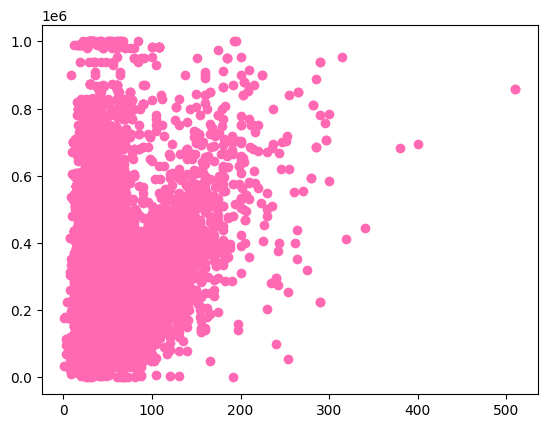

In [ ]:
prix = df['Prix']
surface = df['Surface']

plt.scatter(surface, prix, color = 'hotpink')


In [ ]:
print(prix.shape)

(16685,)
